<a href="https://colab.research.google.com/github/DannMacias/customer-segmentation/blob/main/04_pca_and_agglomerative_clustering_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Customer segmentation (part 4): PCA and agglomerative clustering 🛒🎯 </b>

Previously, I clustered with three characteristics (Income, Total amount spent and number of children). However, while these features can get valuable customer information, I don't have a complete customer profile; other variables such as marital status, or education, or even seniority when shopping at the store, have not been taken into account.

That is why in this last section, I am going to combine all these variables to obtain a more complete profile of the client. To do this, first I will perform a dimension reduction (to have only 3 features) and finally I will perform agglomerative clustering.

# 0. Getting setup

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style("whitegrid")

# For PCA, and Agglomerative clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Get the data from GitHub repo
data_path = "https://github.com/DannMacias/customer-segmentation/raw/main/clean_customer_analysis_database.csv"
df = pd.read_csv(data_path)
df.head()

# 1. Data preprocessing

In this section, I'll perform some preprocessing of the data, specifically:
* Label encoding the categorical features
* Scaling the features using `StandardScaler`.

## Label encoding the categorical features

In [3]:
# Get a list of all the categorical features
categorical = (df.dtypes == "object")
columns_categorical = list(categorical[categorical].index)
print(f"Categorical features in the dataset: {columns_categorical}")

Categorical features in the dataset: ['Education', 'Partner']


In [4]:
# Label encoding the categorical features
label_encoder = LabelEncoder()

# Encoding the columns
for i in columns_categorical:
  df[i] = df[[i]].apply(label_encoder.fit_transform)

df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Response,Total_Spent,Age,Seniority,Partner,Num_Childer,Num_Childen,Num_Children,Family_Size,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,1,1617,57,971,0,0,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,27,60,125,0,2,2,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,776,49,472,1,0,0,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,53,30,65,1,1,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,422,33,321,1,1,1,1,3,1


In [5]:
# Education after label encoding
df["Education"].unique()

array([0, 1, 2])

For Education:
* 0 - Graduate
* 1 - Postgraduate
* 2 - Undergraduate

In [9]:
# Partner after label encoding
df["Partner"].unique()

array([0, 1])

For Partner:
* 0 - Alone
* 1 - Partner

## Scale the data and make a subset for dimensional reduction

In [11]:
# Creating a copy of the data
df2 = df.copy()

# Creating a subset of DataFrame by dropping the features that I don't need
features_drop = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1",
                 "AcceptedCmp2", "Complain", "Response", "Num_Childer", "Num_Childen"]

df2 = df.drop(features_drop, axis = 1)

In [12]:
# Check the columns of the subset
df2.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Total_Spent', 'Age', 'Seniority', 'Partner',
       'Num_Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [13]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(df2)

scaled_df2 = pd.DataFrame(std_scaler.transform(df2), columns = df2.columns)
scaled_df2.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Age,Seniority,Partner,Num_Children,Family_Size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,1.675488,0.986443,1.974875,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-0.962358,1.236801,-1.665141,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,0.280250,0.318822,-0.172132,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-0.919224,-1.266777,-1.923298,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-0.307044,-1.016420,-0.821827,0.741384,0.070501,0.450009,0.632356


The `scaled_df2` will use for dimensionality reduction.

# 2. Dimensionality reduction



In this subset, there are many features based on which the final classification will be made. The higher the number of features, the higher the work and difficulty of working with them. Futhermore, many of these features are correlated, that is, they are redundant.

That is why I'll do a dimensionality reduction on the subset created above. As its name implies, **dimensionality reduction** is the process of reducing the number of random variables to obtain a set of principal variables.

The most common technique for reducing the dimensions of the data set is **Principal Component Analysis** (PCA). By reducing the dimensions, the interpretability of the data increase and, at the same time, the loss of information are minimized.

For this project, I'll reduce the dimensions to 3.


In [14]:
# Initiating PCA to reduce dimensions to 3
pca = PCA(n_components = 3)

# Fit the model
pca.fit(scaled_df2)

# Create a DataFrame
pca_df = pd.DataFrame(pca.transform(scaled_df2), columns = (["pc1", "pc2", "pc3"]))
pca_df.head()

,pc1,pc2,pc3
0,5.028126,-0.070709,2.607173
1,-2.905226,-0.086611,-1.814046
2,2.580563,-0.718060,-0.238815
3,-2.608773,-1.533670,-0.915838
4,-0.679287,0.209032,-0.015538


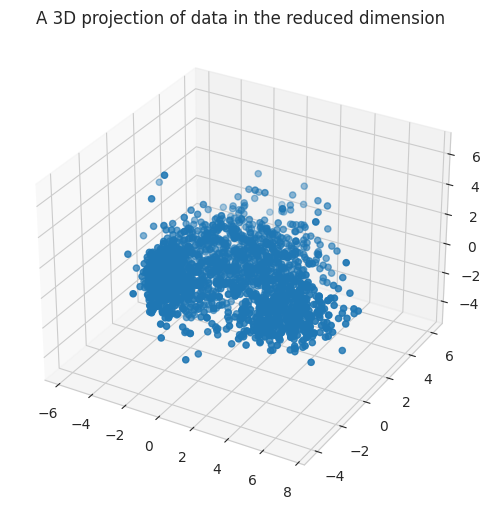

In [15]:
# Plot a 3D projection od the data with reduced dimensions
x = pca_df["pc1"]
y = pca_df["pc2"]
z = pca_df["pc3"]

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z)
ax.set_title("A 3D projection of data in the reduced dimension")
plt.show()

# 3. Agglomerative clustering

Once the data set has been reduced to three dimensions, I'll be performing clusterin via Agglomerative clustering. **Aglomerative clustering** is a hierarchical clustering method. As Wikipedia page say:

> *Hierarchical clustering* (HCA) is a method of cluster analysis that seek to build a hierarchy of clusters. 
>
> An *agglomerative clustering* is a "bottom up" approach, each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
>
> [Wikipedia page of Hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

First, I'll use the elbow method to determine the number of optimal clusters.


In [16]:
# Try to install kneed from https://github.com/arvkevi/kneed
try:
  from kneed import KneeLocator
except:
  !pip install kneed
  from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Get a list of erros for the Elbow method
errors = []
for k in range(1, 11): # from 0 to 10 clusters
  model = KMeans(n_clusters = k, random_state = 42)
  model.fit(pca_df) # fit the model with the reduced dimensions data
  errors.append(model.inertia_) # inertia = error of the model

In [18]:
# Use KneeLocator to find the optimal number of clusters
k1 = KneeLocator(x = range(1, 11), # from 0 to 10 clusters
                 y = errors,
                 curve = "convex",
                 direction = "decreasing")

print(f"The optimun number of clusters is {k1.elbow} clusters")

The optimun number of clusters is 3 clusters


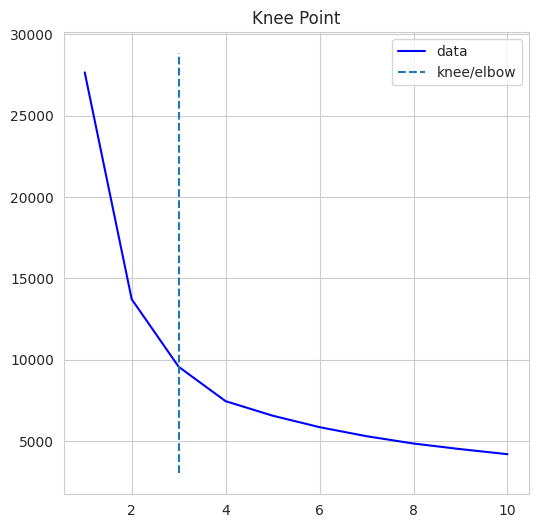

In [19]:
# Plotting the k1
k1.plot_knee()

Three will be an optimal number of clusters for this data. Let's initiating the Agglomerative Clustering Model with 3 clusters.

In [24]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters = 3)

# Fit the model and predict clusters
Y_AC = AC.fit_predict(pca_df)

# Adding the clusters feature to the original DataFrame
pca_df["Clusters"] = Y_AC
df["Clusters"] = Y_AC

In [25]:
# Check the original DataFrame with the clusters added
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Total_Spent,Age,Seniority,Partner,Num_Childer,Num_Childen,Num_Children,Family_Size,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,1617,57,971,0,0,0,0,1,0,2
1,0,46344.0,1,1,38,11,1,6,2,1,...,27,60,125,0,2,2,2,3,1,0
2,0,71613.0,0,0,26,426,49,127,111,21,...,776,49,472,1,0,0,0,2,0,2
3,0,26646.0,1,0,26,11,4,20,10,3,...,53,30,65,1,1,1,1,3,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,422,33,321,1,1,1,1,3,1,1


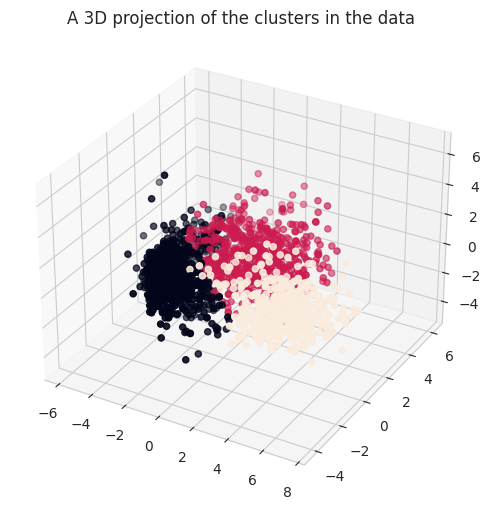

In [26]:
# Plotting the clusters in a 3D projection
fig = plt.figure(figsize = (8, 6))
ax = plt.subplot(111, projection = "3d")
ax.scatter(x, y, z, c = pca_df["Clusters"])
ax.set_title("A 3D projection of the clusters in the data")
plt.show()

# 4. Exploring the clusters

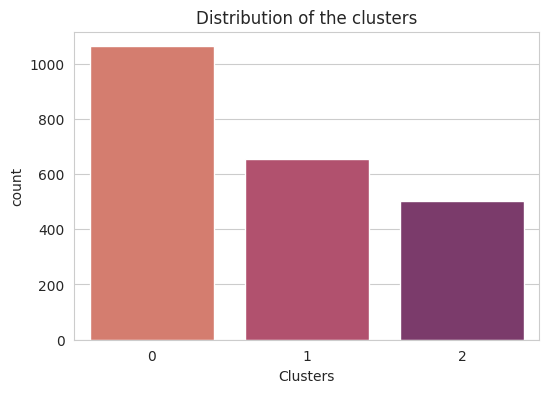

In [68]:
# Countplot of the clusters
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = "Clusters", palette = "flare")
plt.title("Distribution of the clusters");

Cluster 0 has the most datapoints, followed by cluster 1 and cluster 2 (which has about half the datapoints of cluster 0).

## Income vs Total spent

In [36]:
# Compare Incoe vs. Total spent
df.groupby("Clusters")[["Income", "Total_Spent"]].mean()

,Income,Total_Spent
Clusters,,
0,35790.755179,107.151601
1,61847.206738,841.897397
2,74618.564870,1360.728543


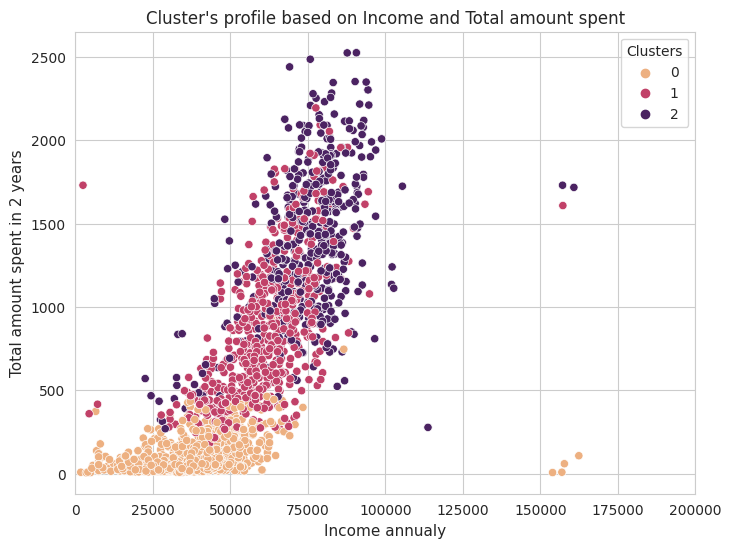

In [67]:
# Plot Income vs. Total spent
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "Income", y = "Total_Spent", hue = "Clusters", palette = "flare")
plt.title("Cluster's profile based on Income and Total amount spent")
plt.xlim(0, 200_000)
plt.xlabel("Income annualy", size = 11)
plt.ylabel("Total amount spent in 2 years", size = 11);

* Cluster 0 - Average income of 35,000 per year and they spent an average of 107, they are the clients who spend less and earn less.

* Cluster 1 - Average income of 61,000 per year and they spent an average of 841, they are the clients with an average income and expense.

* Cluster 2 - Average income of 74,000 per year and they spent an average of 1,360, they are the clients that spend the most and have the highest income.

## Promotions accepted by the customers

In [64]:
# Compare Accepted promotions
# Create a feature to get a sum of accepted promotions
df["Total_promos"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

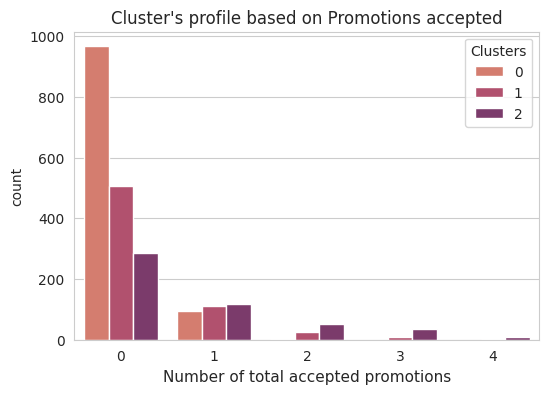

In [70]:
# Plot a counterplot
plt.figure(figsize = (6, 4))
sns.countplot(data = df, x = "Total_promos", hue = "Clusters", palette = "flare")
plt.title("Cluster's profile based on Promotions accepted")
plt.xlabel("Number of total accepted promotions", size = 11);

According to the graph, there does not seem to be a response to promotional campaigns, a large part of customers do not take these promotions into account. Perhaps better targeted and well-planned campaigns are required to boost sales.

## Profiling the customers

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 640x480 with 0 Axes>

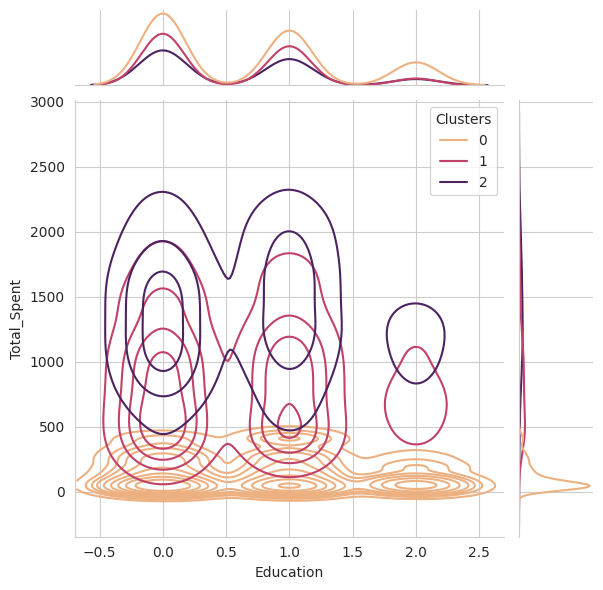

<Figure size 640x480 with 0 Axes>

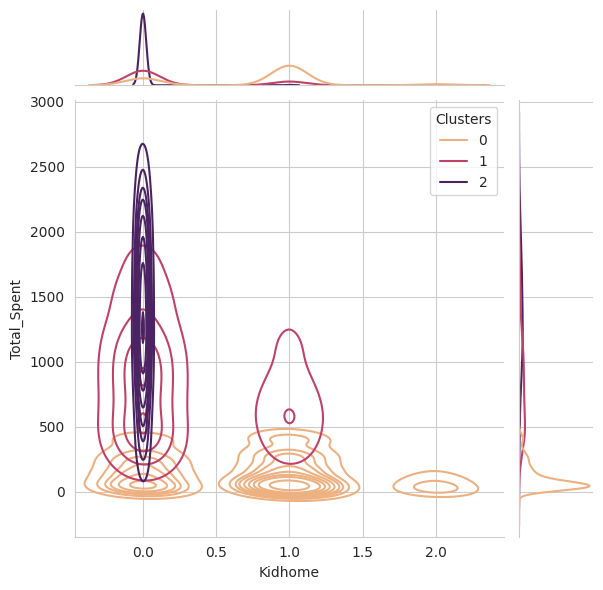

<Figure size 640x480 with 0 Axes>

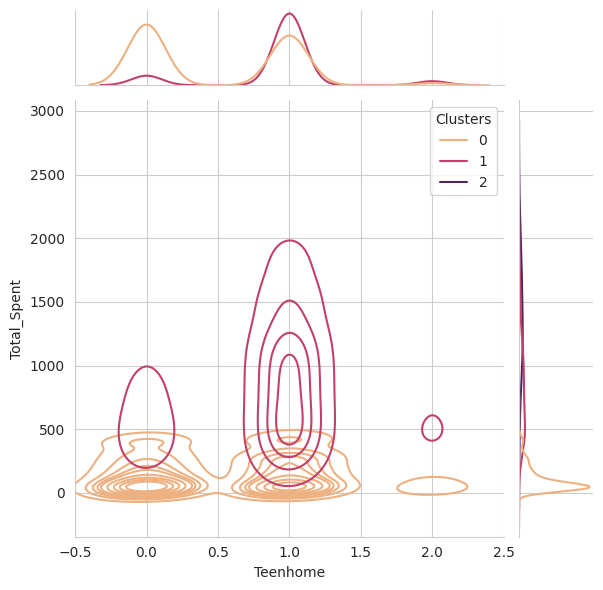

<Figure size 640x480 with 0 Axes>

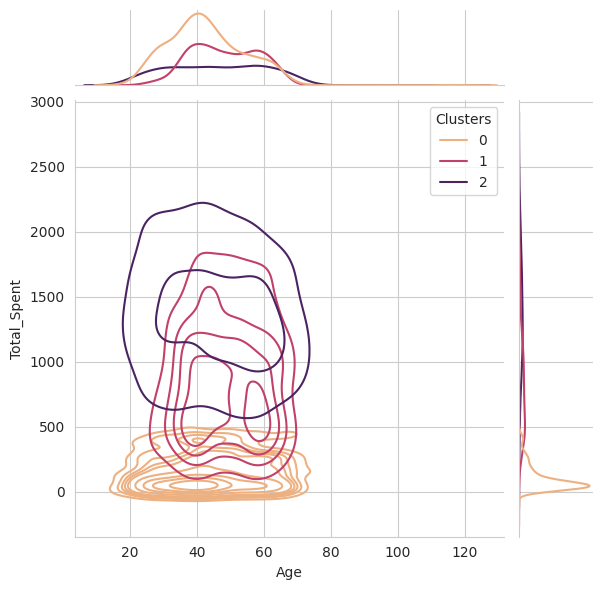

<Figure size 640x480 with 0 Axes>

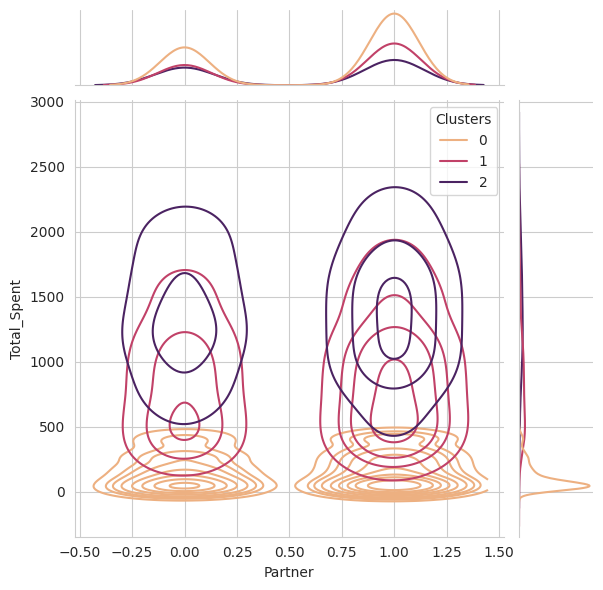

<Figure size 640x480 with 0 Axes>

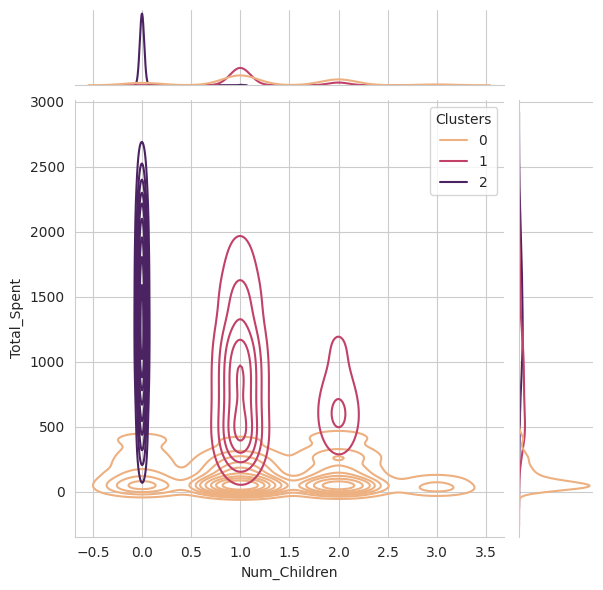

<Figure size 640x480 with 0 Axes>

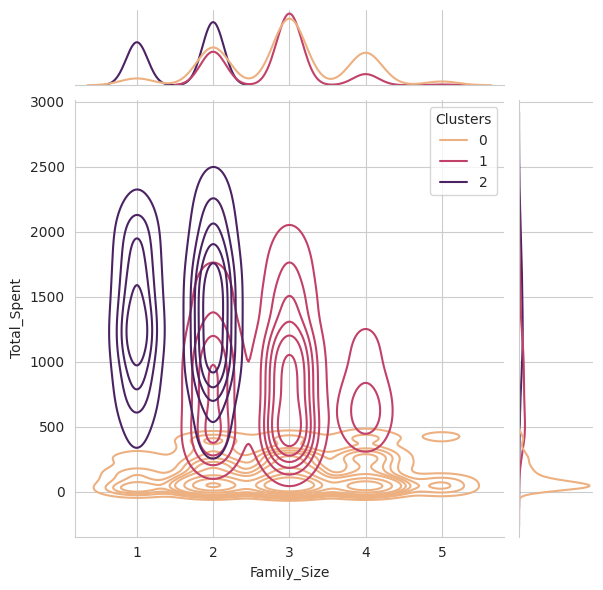

<Figure size 640x480 with 0 Axes>

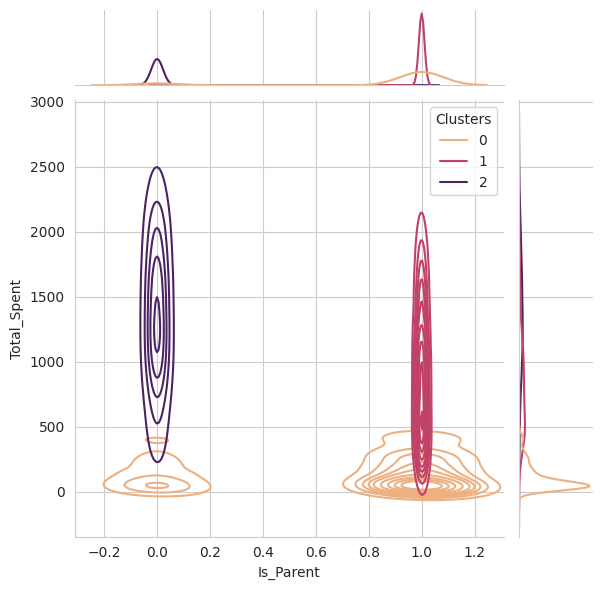

In [72]:
# Features to plot
features = ["Education", "Kidhome", "Teenhome", "Age", "Partner", "Num_Children",
            "Family_Size", "Is_Parent"]

# Plot a jointplot for the features selected
for i in features:
  plt.figure()
  sns.jointplot(data = df, x = i, y = "Total_Spent", hue = "Clusters",
              kind = "kde", palette = "flare");

# Conclusions

The following information can be deduced about the customers in different clusters.

**About Cluster Number: 0**
* They have an average annual income of 35,000, they are the clients with the lowest income.
* They are the customers who spent the least in the store, with an average of 107.
* Most are not graduated or have only a bachelor's degree.
* Most have 1 or more children (kids and teenagers)
* Most usually have a partner.

**About Cluster Number: 1**
* They have an average annual income of 61,000.
* Their average spend in the store was 841.
* Most do not have a degree.
* Most have 1 or 2 children. They don't have kids, but they do have teenagers.
* Most have a partner and all are parents.

**About Cluster Number: 2**
* They have an average annual income of 74,000, they are the clients with the highest income.
* They are the customers who spent the most in the store, with an average of 1,360.
* Most have a bachelor's degree.
* You do not have children or adolescents at home.
* Some have a partner, others do not, the distribution is the same for this cluster.
* Definitely do not have children

The customer who spent the most in the store was the one with a high annual income, who has an academic degree who also has no children, and who is single (mostly). The customer profile with the lowest spending in the store was the one with more than 1 child, that is, mothers and, fathers. This can be a turning point for the store's marketing team since it can grant offers or promotions focused on favoring parents.

